In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Part 1 - Machine Learning - Data Preparation
# Loading dataset. 
data = pd.read_excel('ENB2012_data.xlsx')
print(data)

# Extracting inputs.
inputs = data.values[:,:8].astype(float)
targets = data.values[:,8:].astype(float)

# Projecting data into 2 dimensions with PCA.
pca = PCA(n_components = 2)
compressed = pca.fit_transform(inputs)

# Scaling the data.
scaler = MinMaxScaler()
scaled = scaler.fit_transform(inputs)

print(inputs.ptp(axis=0))
print(scaled.ptp(axis=0))

       X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0    0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1    0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2    0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3    0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4    0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28
..    ...    ...    ...     ...  ...  ..  ...  ..    ...    ...
763  0.64  784.0  343.0  220.50  3.5   5  0.4   5  17.88  21.40
764  0.62  808.5  367.5  220.50  3.5   2  0.4   5  16.54  16.88
765  0.62  808.5  367.5  220.50  3.5   3  0.4   5  16.44  17.11
766  0.62  808.5  367.5  220.50  3.5   4  0.4   5  16.48  16.61
767  0.62  808.5  367.5  220.50  3.5   5  0.4   5  16.64  16.03

[768 rows x 10 columns]
[  0.36 294.   171.5  110.25   3.5    3.     0.4    5.  ]
[1. 1. 1. 1. 1. 1. 1. 1.]


In [4]:
# Part 1 - Machine Learning - Regression

# Making training and testing data.
X_train, X_test, y_train, y_test = train_test_split(compressed, targets, test_size = 0.2, random_state = 0)

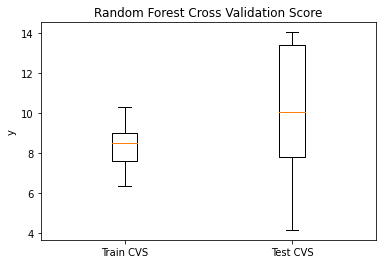

In [6]:
# Random Forest Regressor.
def random_forest_regressor():
    for i in range(100):
        regressor = RandomForestRegressor()
        regressor.fit(X_train, y_train)
        y_pred = regressor.predict(X_test)
        x_pred = regressor.predict(y_test)
    train_scores = cross_val_score(regressor, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")
    test_scores = cross_val_score(regressor, X_test, y_test, cv = 10, scoring = "neg_mean_squared_error")
        
    
    plt.figure()
    plt.title("Random Forest Cross Validation Score")
    plt.boxplot([abs(train_scores), abs(test_scores)])
    plt.xticks([1, 2], ["Train CVS", "Test CVS"])
    plt.ylabel("y")
    plt.show()

random_forest_regressor()

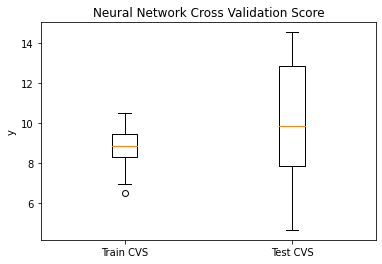

In [7]:
# Neural Network.
def neural_network():
    for i in range(100):
        regressor = MLPRegressor(max_iter = 6000)
        regressor.fit(X_train, y_train)
        y_pred = regressor.predict(X_test)
        x_pred = regressor.predict(y_test)
    train_scores = cross_val_score(regressor, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")
    test_scores = cross_val_score(regressor, X_test, y_test, cv = 10, scoring = "neg_mean_squared_error")

    plt.figure()
    plt.title("Neural Network Cross Validation Score")
    plt.boxplot([abs(train_scores), abs(test_scores)])
    plt.xticks([1, 2], ["Train CVS", "Test CVS"])
    plt.ylabel("y")
    plt.show()
    
neural_network()

C:\Users\samal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\samal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\samal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py", line 190, in fit
    X, y = self._validate_data(
  File "C:\Users\samal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py",

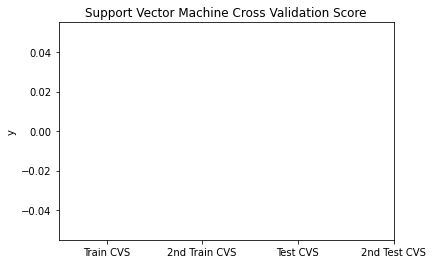

In [20]:
# Support Vector Machine.
def support_vector_machine(): 
    for i in range(100):
        svregressor = SVR()
        svregressor.fit(X_train, y_train[:, 1])
        y_pred = svregressor.predict(X_test)
        x_pred = svregressor.predict(y_test)
        
    train_scores = cross_val_score(svregressor, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")
    test_scores = cross_val_score(svregressor, X_test, y_test, cv = 10, scoring = "neg_mean_squared_error")
    
    plt.figure()
    plt.title("Support Vector Machine Cross Validation Score")
    plt.boxplot([abs(train_scores), abs(test_scores)])
    plt.xticks([1, 2, 3, 4], ["Train CVS", "2nd Train CVS", "Test CVS", "2nd Test CVS"])
    plt.ylabel("y")
    plt.show()
    
support_vector_machine()